In [149]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
df['Fare'].mean()

32.2042079685746

In [151]:
df[df['Sex']=='male']['Fare'].mean()

25.523893414211418

In [152]:
df[(df['Survived']==0) & (df['Sex']=='male')]['Age'].max()

74.0

In [153]:
df.loc[0:5, 'PassengerId':'Name']

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"
5,6,0,3,"Moran, Mr. James"


In [154]:
df.iloc[0:5, 0:5]

,PassengerId,Survived,Pclass,Name,Sex
0,1,0,3,"Braund, Mr. Owen Harris",male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,3,1,3,"Heikkinen, Miss. Laina",female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,5,0,3,"Allen, Mr. William Henry",male


In [155]:
df[-1:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [156]:
df[:1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [157]:
columns_to_show=['Fare']
df.groupby(['Pclass'])[columns_to_show].describe(percentiles=[])

Fare                                              
        count       mean        std  min      50%       max
Pclass                                                     
1       216.0  84.154687  78.380373  0.0  60.2875  512.3292
2       184.0  20.662183  13.417399  0.0  14.2500   73.5000
3       491.0  13.675550  11.778142  0.0   8.0500   69.5500

In [158]:
columns_to_show=['Fare']
df.groupby(['Pclass'])[columns_to_show].agg([np.max, np.min, np.mean])

Fare                
            amax amin       mean
Pclass                          
1       512.3292  0.0  84.154687
2        73.5000  0.0  20.662183
3        69.5500  0.0  13.675550

In [159]:
pd.crosstab(df['Sex'], df['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [160]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [161]:
pd.pivot_table(
    df,
    values=['Fare','Age', 'Survived'],
    index=['Pclass'],
    aggfunc='mean'
)

,Age,Fare,Survived
Pclass,,,
1,38.233441,84.154687,0.629630
2,29.877630,20.662183,0.472826
3,25.140620,13.675550,0.242363


In [162]:
f1 = (df['Pclass'] == 1) & (df['Sex'] == 'female')
df.insert(loc=len(df.columns), column='High_survival_chance', value=(f1))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,High_survival_chance
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [163]:
df['Low_survival_chance'] = (df['Pclass'] == 3) & (df['Sex'] == 'male')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,High_survival_chance,Low_survival_chance
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,True


In [164]:
df=df.drop(['High_survival_chance','Low_survival_chance'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
pd.crosstab(df['Survived'],df['Sex'], margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [166]:
df = pd.read_csv('titanic_train.csv')

In [167]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [168]:
df.shape

(891, 12)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [170]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

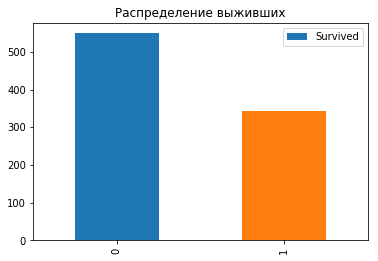

In [171]:
df['Survived'].value_counts().plot(kind='bar', label='Survived')
plt.legend()
plt.title('Распределение выживших');


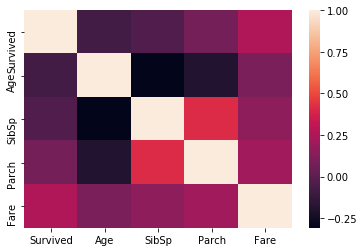

In [172]:
corr_matrix = df.drop(['PassengerId',
                       'Pclass', 
                       'Name',
                       'Ticket', 
                       'Cabin',
                       'Embarked'], axis=1).corr()
sns.heatmap(corr_matrix);

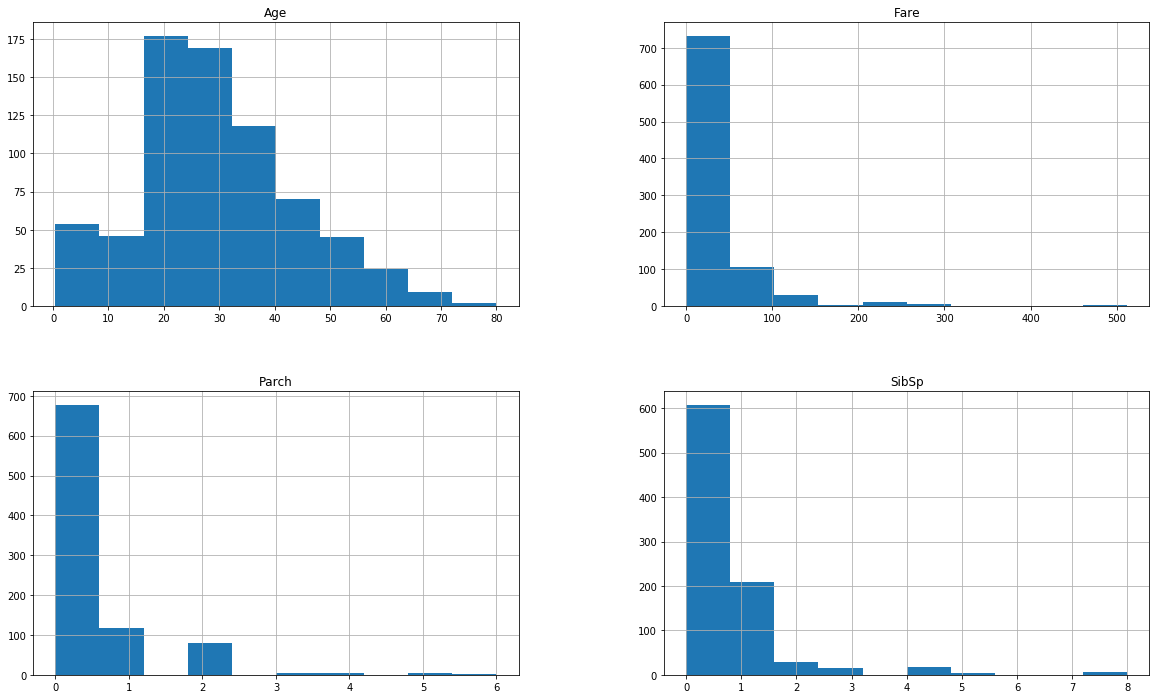

In [188]:
features = list(set(df.columns) - 
    set(['PassengerId', 'Survived', 'Pclass',
         'Name','Sex','Ticket','Cabin','Embarked']))
df[features].hist(figsize=(20,12));

In [194]:
features = list(set(features) - set(['Parch', 'Age']))

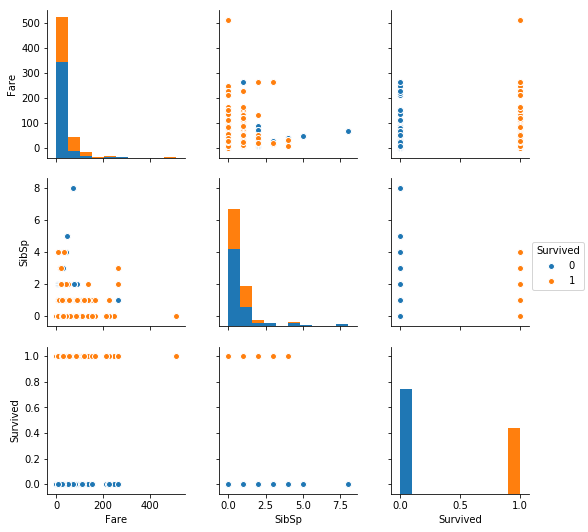

In [195]:
sns.pairplot(df[features+['Survived']], hue='Survived');

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


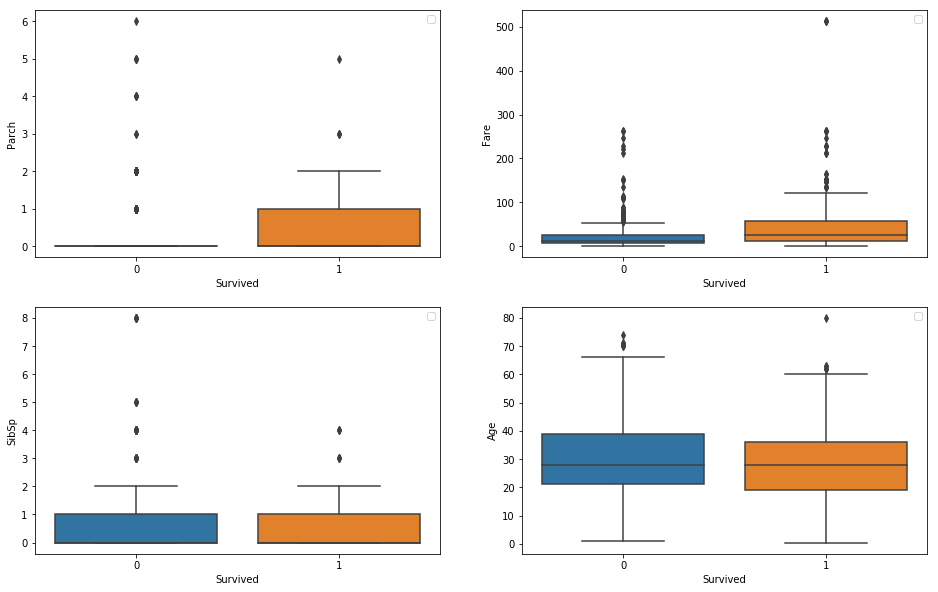

In [202]:
features = list(set(df.columns) - 
    set(['PassengerId', 'Survived', 'Pclass',
         'Name','Sex','Ticket','Cabin','Embarked']))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

for idx, feat in enumerate(features):
    sns.boxplot(x='Survived', y=feat, data=df, ax=axes[idx//2, idx % 2])
    axes[idx // 2, idx % 2].legend()
    axes[idx // 2, idx % 2].set_xlabel('Survived')
    axes[idx // 2, idx % 2].set_ylabel(feat);

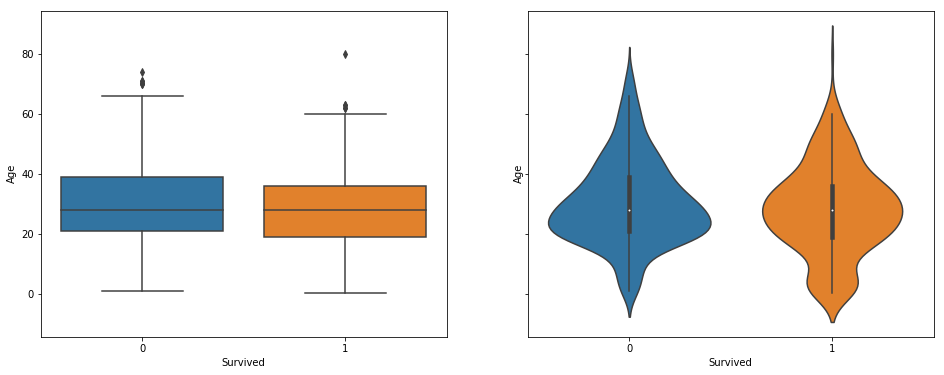

In [204]:
# _, axes=plt.subplots(1,2, sharey=True,figsize=(16,6))
arr = plt.subplots(1,2, sharey=True, figsize=(16,6))
axes = arr[1]
sns.boxplot(x='Survived', y='Age', data=df, ax=axes[0]);
sns.violinplot(x='Survived', y='Age', data=df, ax=axes[1]);

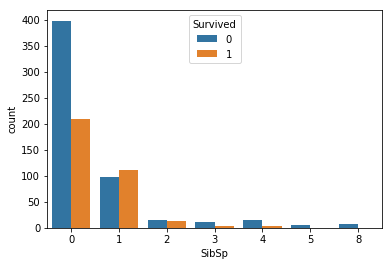

In [205]:
sns.countplot(x='SibSp', hue='Survived', data=df);

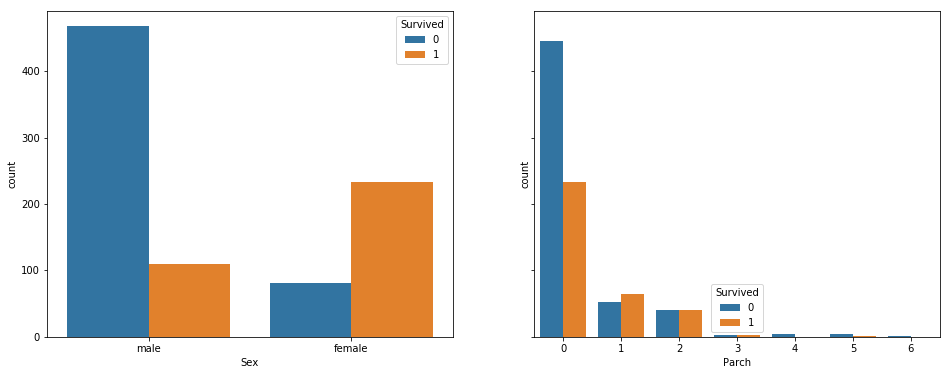

In [208]:
_, axes=plt.subplots(1, 2, sharey=True,figsize=(16,6))
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0]); 
sns.countplot(x='Parch', hue='Survived', data=df,ax=axes[1]);